In [9]:
import numpy as np
import matplotlib.pyplot as plt
import pywt
from PIL import Image
import os

In [10]:
# 이미지 로드 함수
def load_image(image_path):
    img = Image.open(image_path).convert('L')  # 그레이스케일로 변환
    return np.array(img)

In [18]:
img = load_image('saved_patterns/wave_20250420_173452.png')

In [23]:
cD[0][0]

array([[  46.125,  105.875,   63.625,  -40.   , -104.625,  -69.125,
          -7.   ],
       [ 106.25 ,  242.375,  145.75 ,  -91.375, -240.5  , -158.25 ,
         -17.   ],
       [  63.375,  146.125,   87.5  ,  -54.75 , -144.875,  -94.875,
         -10.   ],
       [ -39.75 ,  -92.125,  -54.625,   34.25 ,   91.125,   59.75 ,
           5.5  ],
       [-105.25 , -240.875, -144.75 ,   90.875,  238.875,  156.875,
          17.   ],
       [ -68.75 , -158.5  ,  -95.25 ,   59.75 ,  157.25 ,  102.875,
          10.5  ],
       [   0.   ,    0.   ,    0.   ,    0.   ,    0.   ,    0.   ,
           0.   ]])

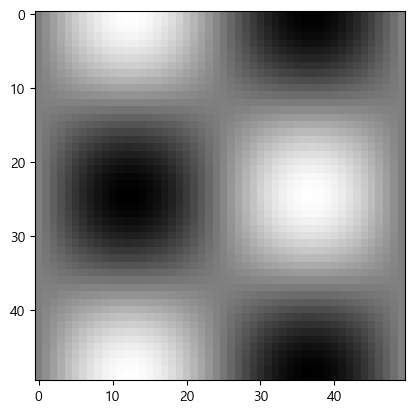

In [26]:
plt.imshow(img, cmap='gray')


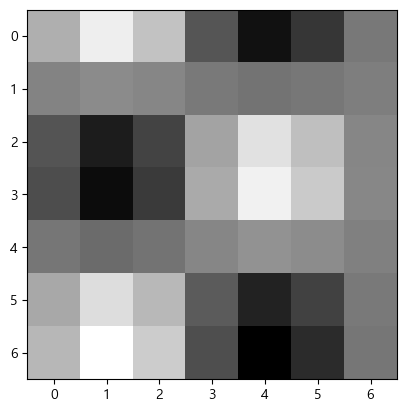

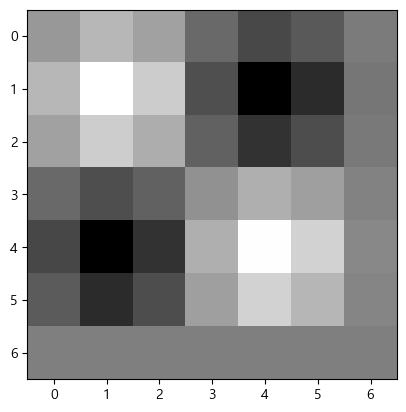

In [24]:
coeffs = pywt.wavedec2(img, 'db1', level=3)
cA, cD = coeffs[0], coeffs[1:]
plt.imshow(cA, cmap='gray')
plt.show()
plt.imshow(cD[0][0], cmap='gray')
plt.show()

In [11]:
# 웨이블렛 변환 및 진폭 추출 함수
def analyze_pattern(image, wavelet='db1', level=3):
    # 웨이블렛 변환 수행
    coeffs = pywt.wavedec2(image, wavelet, level=level)
    
    # 각 레벨별 계수 추출
    cA = coeffs[0]  # 근사 계수
    details = coeffs[1:]  # 상세 계수들
    
    # 진폭 계산
    amplitudes = []
    amplitudes.append(np.abs(cA).mean())  # 근사 계수의 평균 진폭
    
    for detail in details:
        # 각 방향(수평, 수직, 대각선)의 상세 계수에 대한 평균 진폭 계산
        for direction in detail:
            amplitudes.append(np.abs(direction).mean())
    
    return amplitudes, coeffs

In [12]:
# 시각화 함수
def visualize_wavelet(coeffs):
    # 각 레벨의 계수를 시각화
    fig, axes = plt.subplots(2, 2, figsize=(12, 12))
    
    # 근사 계수 시각화
    axes[0, 0].imshow(coeffs[0], cmap='gray')
    axes[0, 0].set_title('Approximation Coefficients')
    
    # 상세 계수 시각화
    for i, (cH, cV, cD) in enumerate(coeffs[1:]):
        axes[0, 1].imshow(cH, cmap='gray')
        axes[0, 1].set_title('Horizontal Details')
        
        axes[1, 0].imshow(cV, cmap='gray')
        axes[1, 0].set_title('Vertical Details')
        
        axes[1, 1].imshow(cD, cmap='gray')
        axes[1, 1].set_title('Diagonal Details')
    
    plt.tight_layout()
    plt.show()

Analyzing image: wave_20250420_173452.png
Wavelet amplitudes:
Level 0: 1015.1556
Level 1: 82.9362
Level 2: 85.6403
Level 3: 19.3444
Level 4: 23.4512
Level 5: 24.7234
Level 6: 2.9068
Level 7: 6.3536
Level 8: 6.7568
Level 9: 0.4112


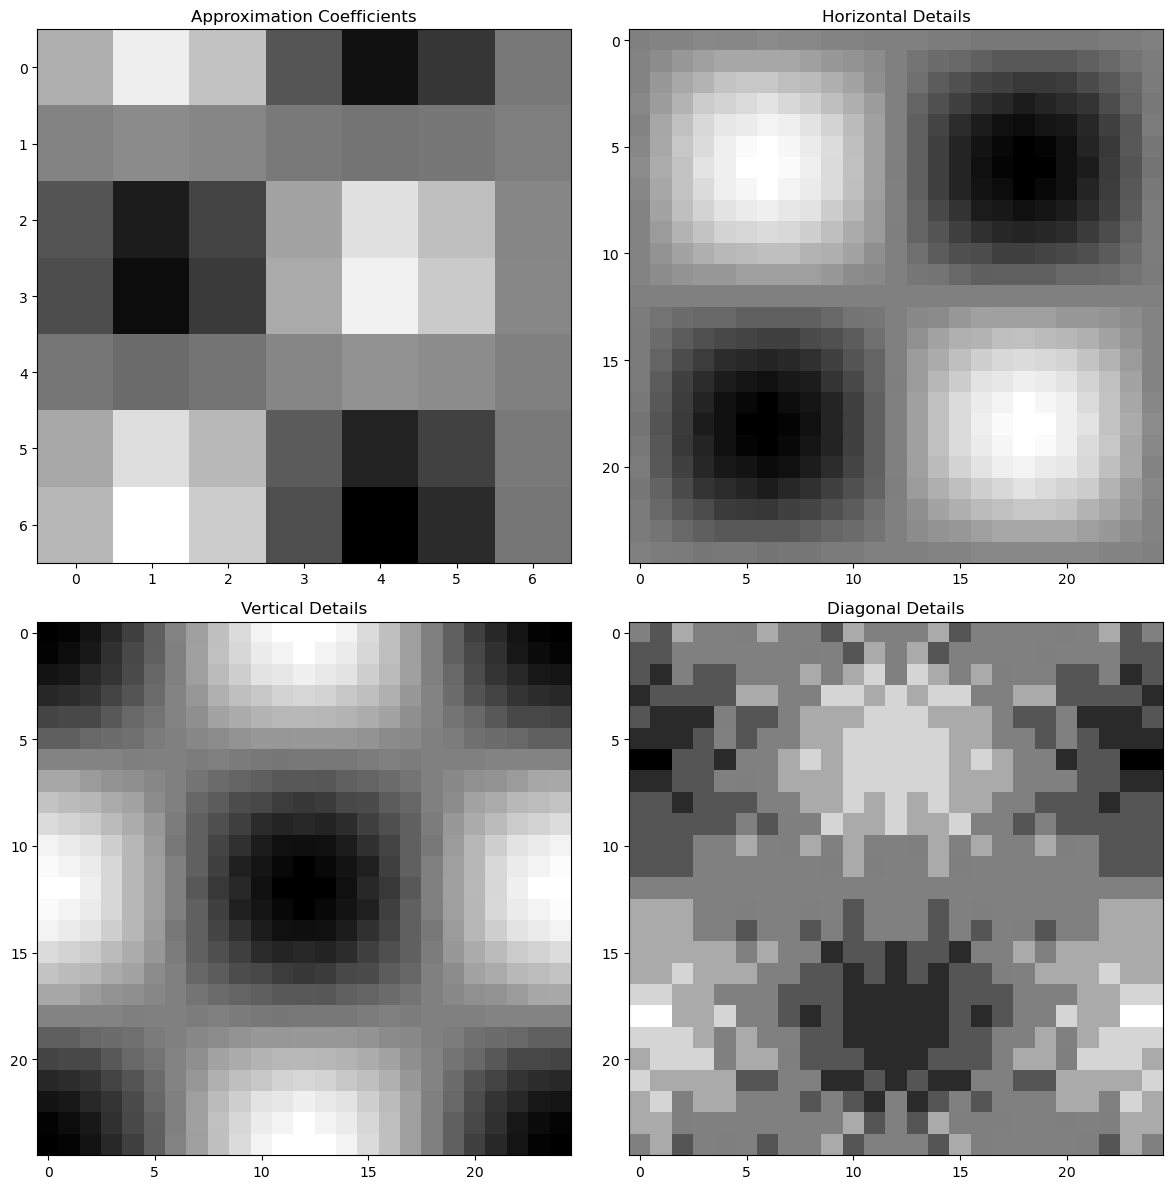

In [13]:
# saved_patterns 디렉토리에서 이미지 파일 찾기
image_files = [f for f in os.listdir('saved_patterns') if f.endswith(('.png', '.jpg', '.jpeg'))]

if not image_files:
    print("No image files found in saved_patterns directory")
else:
    # 첫 번째 이미지 파일 사용
    image_path = os.path.join('saved_patterns', image_files[0])
    
    # 이미지 로드
    image = load_image(image_path)
    
    # 웨이블렛 분석 수행
    amplitudes, coeffs = analyze_pattern(image)
    
    # 결과 출력
    print(f"Analyzing image: {image_files[0]}")
    print("Wavelet amplitudes:")
    for i, amp in enumerate(amplitudes):
        print(f"Level {i}: {amp:.4f}")
    
    # 시각화
    visualize_wavelet(coeffs)


웨이블렛 변환 주파수 대역 정보:
샘플링 주파수: 50 Hz
Nyquist 주파수: 25.0 Hz

각 레벨별 주파수 대역:
Level 1 상세 계수: 12.50 - 25.00 Hz
Level 2 상세 계수: 6.25 - 12.50 Hz
Level 3 상세 계수: 3.12 - 6.25 Hz
Level 3 근사 계수: 0 - 3.12 Hz


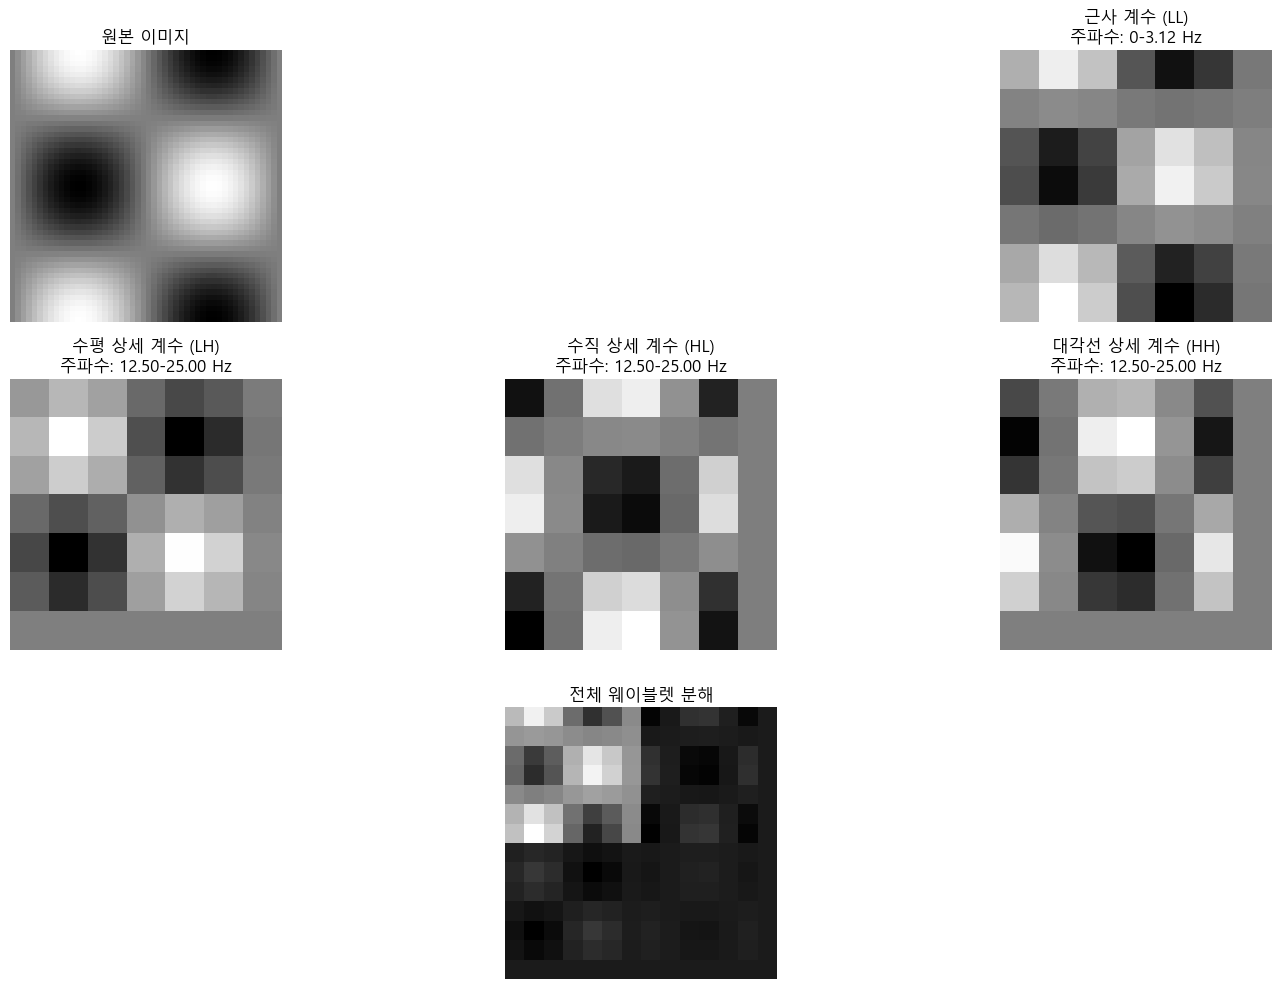

In [27]:
import numpy as np
import matplotlib.pyplot as plt
import pywt
from PIL import Image
import os

def calculate_frequency_bands(sampling_freq, level):
    """
    웨이블렛 변환의 각 레벨별 주파수 대역 계산
    
    Parameters:
    sampling_freq: 샘플링 주파수 (Hz)
    level: 웨이블렛 변환 레벨
    
    Returns:
    frequency_bands: 각 레벨의 주파수 대역 리스트
    """
    frequency_bands = []
    
    # Nyquist 주파수 (최대 주파수)
    nyquist = sampling_freq / 2
    
    # 각 레벨별 주파수 대역 계산
    for l in range(level):
        # 상세 계수의 주파수 대역
        high_freq = nyquist / (2 ** l)
        low_freq = nyquist / (2 ** (l + 1))
        frequency_bands.append((low_freq, high_freq))
    
    # 마지막 근사 계수의 주파수 대역
    frequency_bands.append((0, nyquist / (2 ** level)))
    
    return frequency_bands

def visualize_wavelet_with_frequencies(image_path, wavelet='db1', level=3, sampling_freq=1000):
    # 이미지 로드 및 그레이스케일 변환
    img = Image.open(image_path).convert('L')
    img_array = np.array(img)
    
    # 웨이블렛 변환 수행
    coeffs = pywt.wavedec2(img_array, wavelet, level=level)
    cA, *cD = coeffs
    
    # 주파수 대역 계산
    frequency_bands = calculate_frequency_bands(sampling_freq, level)
    
    # 그래프 레이아웃 설정
    fig = plt.figure(figsize=(15, 10))
    
    # 1. 원본 이미지
    ax1 = plt.subplot2grid((3, 3), (0, 0))
    ax1.imshow(img_array, cmap='gray')
    ax1.set_title('원본 이미지')
    ax1.axis('off')
    
    # 2. 근사 계수
    ax3 = plt.subplot2grid((3, 3), (0, 2))
    ax3.imshow(cA, cmap='gray')
    ax3.set_title(f'근사 계수 (LL)\n주파수: 0-{frequency_bands[-1][1]:.2f} Hz')
    ax3.axis('off')
    
    # 3-5. 상세 계수들
    titles = ['수평 상세 계수 (LH)',
             '수직 상세 계수 (HL)',
             '대각선 상세 계수 (HH)']
    
    for i, (title, detail) in enumerate(zip(titles, cD[0])):
        ax = plt.subplot2grid((3, 3), (1, i))
        ax.imshow(detail, cmap='gray')
        freq_band = frequency_bands[0]  # 첫 번째 레벨의 주파수 대역
        ax.set_title(f'{title}\n주파수: {freq_band[0]:.2f}-{freq_band[1]:.2f} Hz')
        ax.axis('off')
    
    # 6. 주파수 대역 정보 출력
    print("\n웨이블렛 변환 주파수 대역 정보:")
    print(f"샘플링 주파수: {sampling_freq} Hz")
    print(f"Nyquist 주파수: {sampling_freq/2} Hz")
    print("\n각 레벨별 주파수 대역:")
    for i, (low, high) in enumerate(frequency_bands[:-1]):
        print(f"Level {i+1} 상세 계수: {low:.2f} - {high:.2f} Hz")
    print(f"Level {level} 근사 계수: 0 - {frequency_bands[-1][1]:.2f} Hz")
    
    # 7. 전체 웨이블렛 분해 시각화
    ax7 = plt.subplot2grid((3, 3), (2, 0), colspan=3)
    coeffs_arr = np.concatenate([
        np.concatenate([cA, cD[0][1]], axis=1),
        np.concatenate([cD[0][0], cD[0][2]], axis=1)
    ], axis=0)
    ax7.imshow(coeffs_arr, cmap='gray')
    ax7.set_title('전체 웨이블렛 분해')
    ax7.axis('off')
    
    plt.tight_layout()
    plt.show()

# 이미지 파일 찾기 및 처리
image_files = [f for f in os.listdir('saved_patterns') if f.endswith(('.png', '.jpg', '.jpeg'))]

if not image_files:
    print("No image files found in saved_patterns directory")
else:
    # 첫 번째 이미지 파일 사용
    image_path = os.path.join('saved_patterns', image_files[0])
    # 샘플링 주파수는 이미지의 가로 픽셀 수로 가정
    img = Image.open(image_path)
    sampling_freq = img.width  # 이미지 너비를 샘플링 주파수로 사용
    visualize_wavelet_with_frequencies(image_path, wavelet='db1', level=3, sampling_freq=sampling_freq)

In [84]:
HL.shape

(128, 128)

In [ ]:
HL

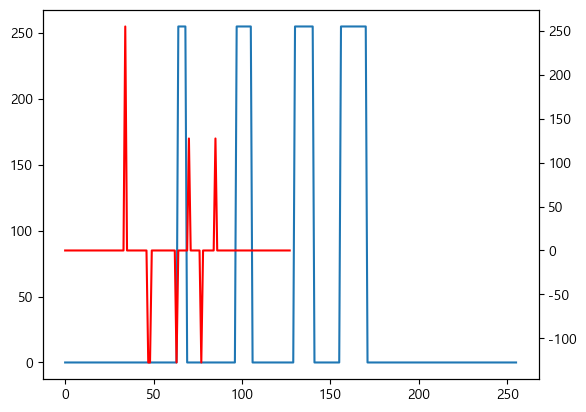

In [87]:
plt.plot(image[100])
plt.twinx()
plt.plot(HL[50],'r')

In [86]:
HL.max()

255.00000000000003

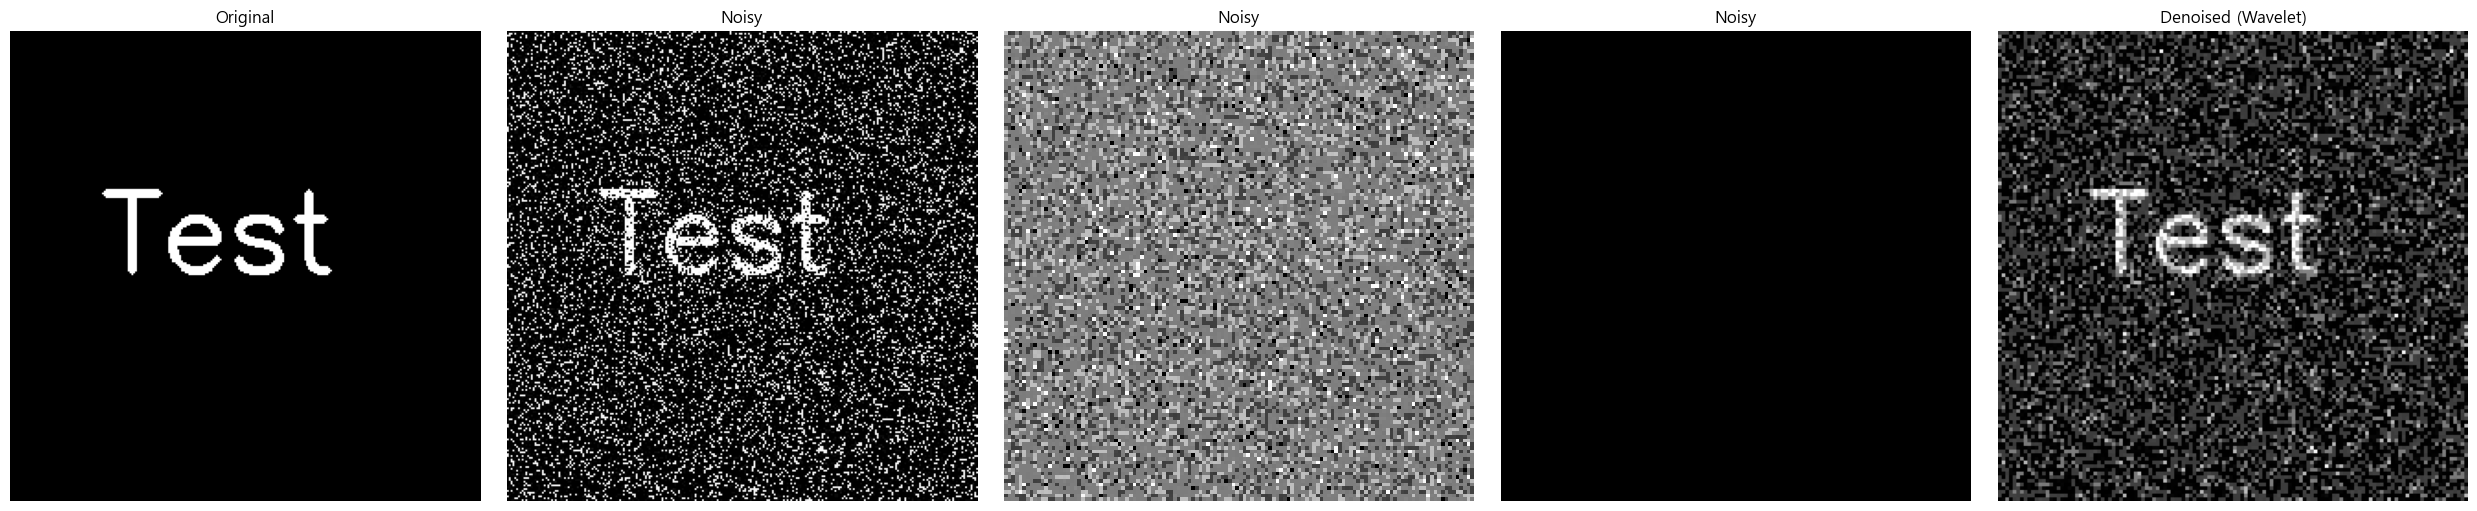

In [96]:
import cv2
import numpy as np
import pywt
import matplotlib.pyplot as plt

# 1. 기본 이미지 생성 (흑백 + 글자)
image = np.zeros((256, 256), dtype=np.uint8)
cv2.putText(image, 'Test', (50, 130), cv2.FONT_HERSHEY_SIMPLEX, 2, 255, 3)

# 2. 노이즈 추가 (가우시안)
np.random.seed(0)
noisy_image = image + 10*np.random.randn(*image.shape).astype(np.uint8)
noisy_image = np.clip(noisy_image, 0, 255)

# 3. 2D 웨이블릿 변환
coeffs2 = pywt.dwt2(noisy_image, 'haar')
LL, (LH, HL, HH) = coeffs2

# 4. 소프트 threshold 함수 정의
def soft_threshold(data, thresh):
    return np.sign(data) *0# np.maximum(np.abs(data) - thresh, 0)

# 5. 고주파 계수에 threshold 적용
threshold = 150
LH_thresh = soft_threshold(LH, threshold)
HL_thresh = soft_threshold(HL, threshold)
HH_thresh = soft_threshold(HH, threshold)

# 6. 역 웨이블릿 변환 (복원)
denoised_image = pywt.idwt2((LL, (LH_thresh, HL_thresh, HH_thresh)), 'haar')
denoised_image = np.clip(denoised_image, 0, 255).astype(np.uint8)

# 7. 결과 시각화
plt.figure(figsize=(25, 5))
plt.subplot(1, 5, 1), plt.imshow(image, cmap='gray'), plt.title("Original"), plt.axis('off')
plt.subplot(1, 5, 2), plt.imshow(noisy_image, cmap='gray'), plt.title("Noisy"), plt.axis('off')
plt.subplot(1, 5, 3), plt.imshow(HH, cmap='gray'), plt.title("Noisy"), plt.axis('off')
plt.subplot(1, 5, 4), plt.imshow(HH_thresh, cmap='gray'), plt.title("Noisy"), plt.axis('off')
plt.subplot(1, 5, 5), plt.imshow(denoised_image, cmap='gray'), plt.title("Denoised (Wavelet)"), plt.axis('off')
plt.tight_layout()
plt.show()


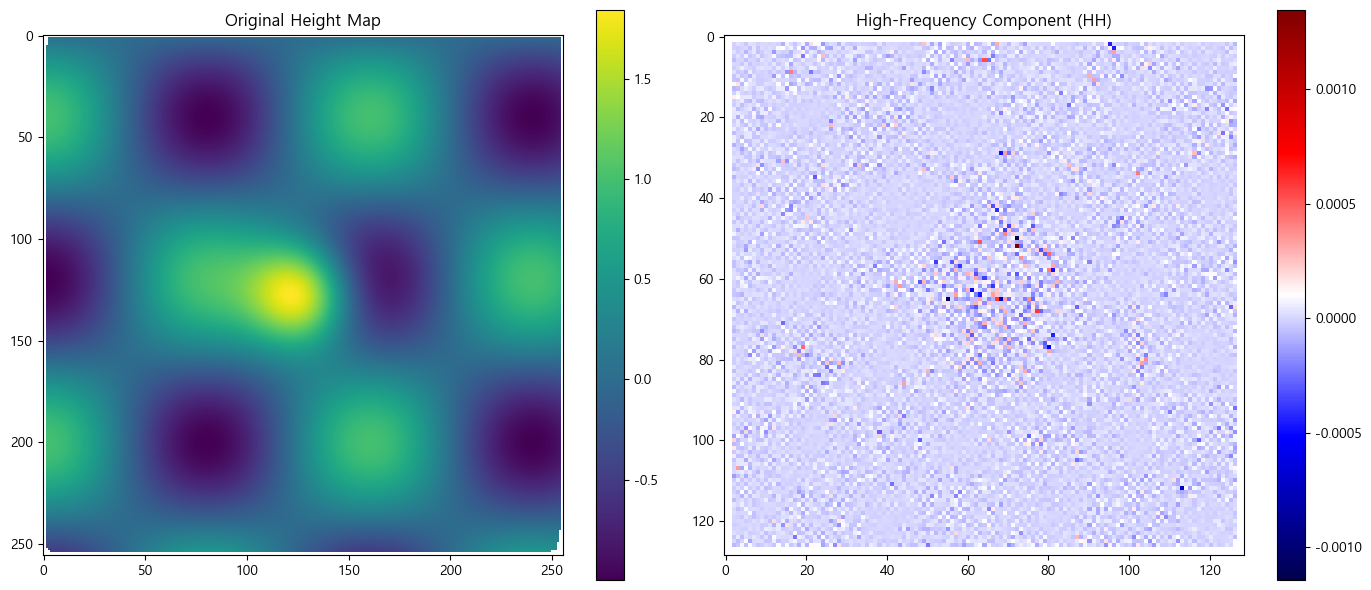

In [100]:
import numpy as np
import matplotlib.pyplot as plt
import pywt
from scipy.interpolate import griddata

# 예시용: 포인트 클라우드 불러오기
# data = np.loadtxt('chip_cloud.xyz')  # (X, Y, Z)

# 예시 데이터 생성 (돌기 포함된 평면)
np.random.seed(0)
x = np.random.uniform(0, 10, 10000)
y = np.random.uniform(0, 10, 10000)
z = np.sin(x) * np.cos(y)
z += np.exp(-((x - 5)**2 + (y - 5)**2)) * 2  # 중앙에 돌기 결함

# 1. 보간 → 2D 높이맵
grid_x, grid_y = np.mgrid[0:10:256j, 0:10:256j]
grid_z = griddata((x, y), z, (grid_x, grid_y), method='cubic')

# 2. 웨이블릿 변환
coeffs2 = pywt.dwt2(grid_z, 'db2')
LL, (LH, HL, HH) = coeffs2

# 3. 시각화
plt.figure(figsize=(14, 6))
plt.subplot(1, 2, 1)
plt.title("Original Height Map")
plt.imshow(grid_z, cmap='viridis')
plt.colorbar()

plt.subplot(1, 2, 2)
plt.title("High-Frequency Component (HH)")
plt.imshow(HH, cmap='seismic')
plt.colorbar()

plt.tight_layout()
plt.show()
